In [306]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [307]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [308]:
#a = train[[ 'MSSubClass', 'LotFrontage', 'LotArea',  'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC','Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
#print(a.corr())


In [309]:
y = train['SalePrice']
del train['SalePrice']

In [310]:
#train.info()

In [311]:
train.drop([ 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LandContour', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 
       'HouseStyle', 'OverallCond', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',  
       'HeatingQC', 'Electrical', '2ndFlrSF',
       'LowQualFinSF',  'BsmtFullBath', 'BsmtHalfBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
        'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Fence'], axis=1, inplace=True)

In [314]:
#train.columns

In [315]:
#train.head()

In [316]:
 #train.info()

In [317]:
train_dummies = pd.get_dummies(train, columns=['MSZoning' , 'LotShape' , 'Utilities',
'Neighborhood' , 'BldgType' , 'ExterQual' , 'Foundation' , 'Heating' , 'CentralAir'])



In [319]:
train_dummies.drop(['Heating_OthW', 'Heating_Floor', 'Utilities_NoSeWa' ], axis=1, inplace=True)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(train_dummies, y, test_size = 0.3, random_state = 0)

In [321]:
from sklearn.preprocessing import StandardScaler

In [322]:
scaler = StandardScaler()

In [323]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [324]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns)
X_train_scaled

TypeError: Index(...) must be called with a collection of some kind, 'SalePrice' was passed

In [325]:
from sklearn.linear_model import LinearRegression

In [326]:
regression = LinearRegression()

In [327]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [328]:
y_pred = regression.predict(X_test)

In [329]:
["{:15} {:.3f}".format(x, y) for y, x in sorted(zip(regression.coef_,train.columns))]

['TotalBsmtSF     -21695.535',
 'GarageCars      -11919.268',
 'FullBath        -10879.639',
 'YearBuilt       -769.638',
 'Neighborhood    6.589',
 'Utilities       21.984',
 'BldgType        47.708',
 'LotShape        321.604',
 'CentralAir      351.630',
 'OverallQual     1828.058',
 'GrLivArea       2424.975',
 '1stFlrSF        4916.127',
 'ExterQual       6806.816',
 'TotRmsAbvGrd    6994.228',
 'Foundation      9183.066',
 'MSZoning        11661.530',
 'Heating         14002.804',
 'Fireplaces      15804.679']

''

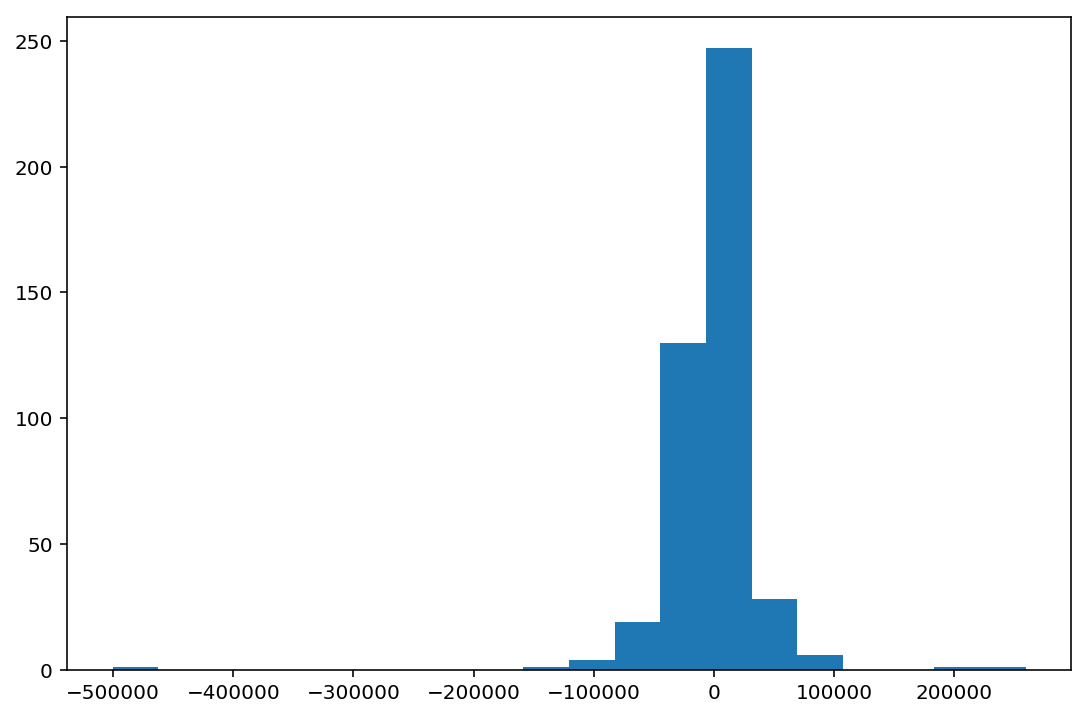

In [330]:
plt.hist(y_test-y_pred, bins=20)
''

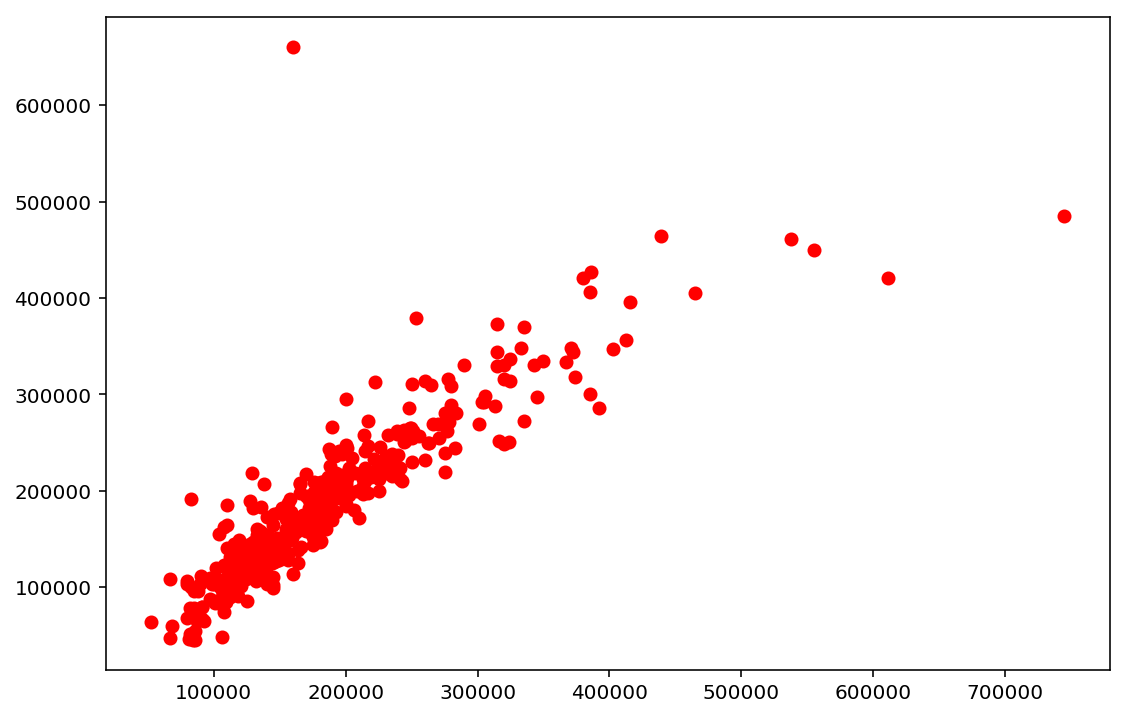

In [331]:
plt.plot(y_test, y_pred, 'ro')

In [332]:
mse = np.mean((y_test-y_pred)**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(y_test-y_pred)))

mse 1546097787.5826623
sqrt(mse) 39320.44999211813
avg_error 21289.6999721448


In [412]:
s4.to_csv( 'Predictions.csv', sep = ';', na_rep = '1', index = False )

In [376]:
prediction = pd.read_csv('prediction.csv')

In [333]:
test.drop([ 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LandContour', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 
       'HouseStyle', 'OverallCond', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',  
       'HeatingQC', 'Electrical', '2ndFlrSF',
       'LowQualFinSF',  'BsmtFullBath', 'BsmtHalfBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
        'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Fence'], axis=1, inplace=True)

In [334]:
#test.info()

In [335]:
test['GarageCars'] = test['GarageCars'].fillna(0.0).astype(int)

test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0.0).astype(int)

In [336]:
test_dummies = pd.get_dummies(test, columns=['MSZoning' , 'LotShape' , 'Utilities',
'Neighborhood' , 'BldgType' , 'ExterQual' , 'Foundation' , 'Heating' , 'CentralAir'])
#X_test1 = test_dummies

In [337]:
from sklearn.preprocessing import Imputer

In [338]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

In [339]:
imputer.fit(X_test1)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [340]:
#X_train

In [341]:
#X_test1.info()

In [343]:
#X_test1_imputed = imputer.transform(X_test1)
#X_test1_imputed = pd.DataFrame(X_test1_imputed, columns=columns)

In [344]:
scaler.fit(X_test1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [258]:
X_test1.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [254]:
X_test1_scaled = scaler.transform(X_test1)
X_test1_scaled = pd.DataFrame(X_test1_scaled, columns=columns)
X_test1_scaled

TypeError: Index(...) must be called with a collection of some kind, 'SalePrice' was passed

In [345]:
y_pred1 = regression.predict(X_test1)

In [347]:
y_pred1

array([106121.30530501, 154989.49441509, 169294.4162153 , ...,
       152507.36292419, 116581.29773224, 225257.80861607])

In [348]:
s3 = pd.Series(y_pred1, [1461,
1462,
1463,
1464,
1465,
1466,
1467,
1468,
1469,
1470,
1471,
1472,
1473,
1474,
1475,
1476,
1477,
1478,
1479,
1480,
1481,
1482,
1483,
1484,
1485,
1486,
1487,
1488,
1489,
1490,
1491,
1492,
1493,
1494,
1495,
1496,
1497,
1498,
1499,
1500,
1501,
1502,
1503,
1504,
1505,
1506,
1507,
1508,
1509,
1510,
1511,
1512,
1513,
1514,
1515,
1516,
1517,
1518,
1519,
1520,
1521,
1522,
1523,
1524,
1525,
1526,
1527,
1528,
1529,
1530,
1531,
1532,
1533,
1534,
1535,
1536,
1537,
1538,
1539,
1540,
1541,
1542,
1543,
1544,
1545,
1546,
1547,
1548,
1549,
1550,
1551,
1552,
1553,
1554,
1555,
1556,
1557,
1558,
1559,
1560,
1561,
1562,
1563,
1564,
1565,
1566,
1567,
1568,
1569,
1570,
1571,
1572,
1573,
1574,
1575,
1576,
1577,
1578,
1579,
1580,
1581,
1582,
1583,
1584,
1585,
1586,
1587,
1588,
1589,
1590,
1591,
1592,
1593,
1594,
1595,
1596,
1597,
1598,
1599,
1600,
1601,
1602,
1603,
1604,
1605,
1606,
1607,
1608,
1609,
1610,
1611,
1612,
1613,
1614,
1615,
1616,
1617,
1618,
1619,
1620,
1621,
1622,
1623,
1624,
1625,
1626,
1627,
1628,
1629,
1630,
1631,
1632,
1633,
1634,
1635,
1636,
1637,
1638,
1639,
1640,
1641,
1642,
1643,
1644,
1645,
1646,
1647,
1648,
1649,
1650,
1651,
1652,
1653,
1654,
1655,
1656,
1657,
1658,
1659,
1660,
1661,
1662,
1663,
1664,
1665,
1666,
1667,
1668,
1669,
1670,
1671,
1672,
1673,
1674,
1675,
1676,
1677,
1678,
1679,
1680,
1681,
1682,
1683,
1684,
1685,
1686,
1687,
1688,
1689,
1690,
1691,
1692,
1693,
1694,
1695,
1696,
1697,
1698,
1699,
1700,
1701,
1702,
1703,
1704,
1705,
1706,
1707,
1708,
1709,
1710,
1711,
1712,
1713,
1714,
1715,
1716,
1717,
1718,
1719,
1720,
1721,
1722,
1723,
1724,
1725,
1726,
1727,
1728,
1729,
1730,
1731,
1732,
1733,
1734,
1735,
1736,
1737,
1738,
1739,
1740,
1741,
1742,
1743,
1744,
1745,
1746,
1747,
1748,
1749,
1750,
1751,
1752,
1753,
1754,
1755,
1756,
1757,
1758,
1759,
1760,
1761,
1762,
1763,
1764,
1765,
1766,
1767,
1768,
1769,
1770,
1771,
1772,
1773,
1774,
1775,
1776,
1777,
1778,
1779,
1780,
1781,
1782,
1783,
1784,
1785,
1786,
1787,
1788,
1789,
1790,
1791,
1792,
1793,
1794,
1795,
1796,
1797,
1798,
1799,
1800,
1801,
1802,
1803,
1804,
1805,
1806,
1807,
1808,
1809,
1810,
1811,
1812,
1813,
1814,
1815,
1816,
1817,
1818,
1819,
1820,
1821,
1822,
1823,
1824,
1825,
1826,
1827,
1828,
1829,
1830,
1831,
1832,
1833,
1834,
1835,
1836,
1837,
1838,
1839,
1840,
1841,
1842,
1843,
1844,
1845,
1846,
1847,
1848,
1849,
1850,
1851,
1852,
1853,
1854,
1855,
1856,
1857,
1858,
1859,
1860,
1861,
1862,
1863,
1864,
1865,
1866,
1867,
1868,
1869,
1870,
1871,
1872,
1873,
1874,
1875,
1876,
1877,
1878,
1879,
1880,
1881,
1882,
1883,
1884,
1885,
1886,
1887,
1888,
1889,
1890,
1891,
1892,
1893,
1894,
1895,
1896,
1897,
1898,
1899,
1900,
1901,
1902,
1903,
1904,
1905,
1906,
1907,
1908,
1909,
1910,
1911,
1912,
1913,
1914,
1915,
1916,
1917,
1918,
1919,
1920,
1921,
1922,
1923,
1924,
1925,
1926,
1927,
1928,
1929,
1930,
1931,
1932,
1933,
1934,
1935,
1936,
1937,
1938,
1939,
1940,
1941,
1942,
1943,
1944,
1945,
1946,
1947,
1948,
1949,
1950,
1951,
1952,
1953,
1954,
1955,
1956,
1957,
1958,
1959,
1960,
1961,
1962,
1963,
1964,
1965,
1966,
1967,
1968,
1969,
1970,
1971,
1972,
1973,
1974,
1975,
1976,
1977,
1978,
1979,
1980,
1981,
1982,
1983,
1984,
1985,
1986,
1987,
1988,
1989,
1990,
1991,
1992,
1993,
1994,
1995,
1996,
1997,
1998,
1999,
2000,
2001,
2002,
2003,
2004,
2005,
2006,
2007,
2008,
2009,
2010,
2011,
2012,
2013,
2014,
2015,
2016,
2017,
2018,
2019,
2020,
2021,
2022,
2023,
2024,
2025,
2026,
2027,
2028,
2029,
2030,
2031,
2032,
2033,
2034,
2035,
2036,
2037,
2038,
2039,
2040,
2041,
2042,
2043,
2044,
2045,
2046,
2047,
2048,
2049,
2050,
2051,
2052,
2053,
2054,
2055,
2056,
2057,
2058,
2059,
2060,
2061,
2062,
2063,
2064,
2065,
2066,
2067,
2068,
2069,
2070,
2071,
2072,
2073,
2074,
2075,
2076,
2077,
2078,
2079,
2080,
2081,
2082,
2083,
2084,
2085,
2086,
2087,
2088,
2089,
2090,
2091,
2092,
2093,
2094,
2095,
2096,
2097,
2098,
2099,
2100,
2101,
2102,
2103,
2104,
2105,
2106,
2107,
2108,
2109,
2110,
2111,
2112,
2113,
2114,
2115,
2116,
2117,
2118,
2119,
2120,
2121,
2122,
2123,
2124,
2125,
2126,
2127,
2128,
2129,
2130,
2131,
2132,
2133,
2134,
2135,
2136,
2137,
2138,
2139,
2140,
2141,
2142,
2143,
2144,
2145,
2146,
2147,
2148,
2149,
2150,
2151,
2152,
2153,
2154,
2155,
2156,
2157,
2158,
2159,
2160,
2161,
2162,
2163,
2164,
2165,
2166,
2167,
2168,
2169,
2170,
2171,
2172,
2173,
2174,
2175,
2176,
2177,
2178,
2179,
2180,
2181,
2182,
2183,
2184,
2185,
2186,
2187,
2188,
2189,
2190,
2191,
2192,
2193,
2194,
2195,
2196,
2197,
2198,
2199,
2200,
2201,
2202,
2203,
2204,
2205,
2206,
2207,
2208,
2209,
2210,
2211,
2212,
2213,
2214,
2215,
2216,
2217,
2218,
2219,
2220,
2221,
2222,
2223,
2224,
2225,
2226,
2227,
2228,
2229,
2230,
2231,
2232,
2233,
2234,
2235,
2236,
2237,
2238,
2239,
2240,
2241,
2242,
2243,
2244,
2245,
2246,
2247,
2248,
2249,
2250,
2251,
2252,
2253,
2254,
2255,
2256,
2257,
2258,
2259,
2260,
2261,
2262,
2263,
2264,
2265,
2266,
2267,
2268,
2269,
2270,
2271,
2272,
2273,
2274,
2275,
2276,
2277,
2278,
2279,
2280,
2281,
2282,
2283,
2284,
2285,
2286,
2287,
2288,
2289,
2290,
2291,
2292,
2293,
2294,
2295,
2296,
2297,
2298,
2299,
2300,
2301,
2302,
2303,
2304,
2305,
2306,
2307,
2308,
2309,
2310,
2311,
2312,
2313,
2314,
2315,
2316,
2317,
2318,
2319,
2320,
2321,
2322,
2323,
2324,
2325,
2326,
2327,
2328,
2329,
2330,
2331,
2332,
2333,
2334,
2335,
2336,
2337,
2338,
2339,
2340,
2341,
2342,
2343,
2344,
2345,
2346,
2347,
2348,
2349,
2350,
2351,
2352,
2353,
2354,
2355,
2356,
2357,
2358,
2359,
2360,
2361,
2362,
2363,
2364,
2365,
2366,
2367,
2368,
2369,
2370,
2371,
2372,
2373,
2374,
2375,
2376,
2377,
2378,
2379,
2380,
2381,
2382,
2383,
2384,
2385,
2386,
2387,
2388,
2389,
2390,
2391,
2392,
2393,
2394,
2395,
2396,
2397,
2398,
2399,
2400,
2401,
2402,
2403,
2404,
2405,
2406,
2407,
2408,
2409,
2410,
2411,
2412,
2413,
2414,
2415,
2416,
2417,
2418,
2419,
2420,
2421,
2422,
2423,
2424,
2425,
2426,
2427,
2428,
2429,
2430,
2431,
2432,
2433,
2434,
2435,
2436,
2437,
2438,
2439,
2440,
2441,
2442,
2443,
2444,
2445,
2446,
2447,
2448,
2449,
2450,
2451,
2452,
2453,
2454,
2455,
2456,
2457,
2458,
2459,
2460,
2461,
2462,
2463,
2464,
2465,
2466,
2467,
2468,
2469,
2470,
2471,
2472,
2473,
2474,
2475,
2476,
2477,
2478,
2479,
2480,
2481,
2482,
2483,
2484,
2485,
2486,
2487,
2488,
2489,
2490,
2491,
2492,
2493,
2494,
2495,
2496,
2497,
2498,
2499,
2500,
2501,
2502,
2503,
2504,
2505,
2506,
2507,
2508,
2509,
2510,
2511,
2512,
2513,
2514,
2515,
2516,
2517,
2518,
2519,
2520,
2521,
2522,
2523,
2524,
2525,
2526,
2527,
2528,
2529,
2530,
2531,
2532,
2533,
2534,
2535,
2536,
2537,
2538,
2539,
2540,
2541,
2542,
2543,
2544,
2545,
2546,
2547,
2548,
2549,
2550,
2551,
2552,
2553,
2554,
2555,
2556,
2557,
2558,
2559,
2560,
2561,
2562,
2563,
2564,
2565,
2566,
2567,
2568,
2569,
2570,
2571,
2572,
2573,
2574,
2575,
2576,
2577,
2578,
2579,
2580,
2581,
2582,
2583,
2584,
2585,
2586,
2587,
2588,
2589,
2590,
2591,
2592,
2593,
2594,
2595,
2596,
2597,
2598,
2599,
2600,
2601,
2602,
2603,
2604,
2605,
2606,
2607,
2608,
2609,
2610,
2611,
2612,
2613,
2614,
2615,
2616,
2617,
2618,
2619,
2620,
2621,
2622,
2623,
2624,
2625,
2626,
2627,
2628,
2629,
2630,
2631,
2632,
2633,
2634,
2635,
2636,
2637,
2638,
2639,
2640,
2641,
2642,
2643,
2644,
2645,
2646,
2647,
2648,
2649,
2650,
2651,
2652,
2653,
2654,
2655,
2656,
2657,
2658,
2659,
2660,
2661,
2662,
2663,
2664,
2665,
2666,
2667,
2668,
2669,
2670,
2671,
2672,
2673,
2674,
2675,
2676,
2677,
2678,
2679,
2680,
2681,
2682,
2683,
2684,
2685,
2686,
2687,
2688,
2689,
2690,
2691,
2692,
2693,
2694,
2695,
2696,
2697,
2698,
2699,
2700,
2701,
2702,
2703,
2704,
2705,
2706,
2707,
2708,
2709,
2710,
2711,
2712,
2713,
2714,
2715,
2716,
2717,
2718,
2719,
2720,
2721,
2722,
2723,
2724,
2725,
2726,
2727,
2728,
2729,
2730,
2731,
2732,
2733,
2734,
2735,
2736,
2737,
2738,
2739,
2740,
2741,
2742,
2743,
2744,
2745,
2746,
2747,
2748,
2749,
2750,
2751,
2752,
2753,
2754,
2755,
2756,
2757,
2758,
2759,
2760,
2761,
2762,
2763,
2764,
2765,
2766,
2767,
2768,
2769,
2770,
2771,
2772,
2773,
2774,
2775,
2776,
2777,
2778,
2779,
2780,
2781,
2782,
2783,
2784,
2785,
2786,
2787,
2788,
2789,
2790,
2791,
2792,
2793,
2794,
2795,
2796,
2797,
2798,
2799,
2800,
2801,
2802,
2803,
2804,
2805,
2806,
2807,
2808,
2809,
2810,
2811,
2812,
2813,
2814,
2815,
2816,
2817,
2818,
2819,
2820,
2821,
2822,
2823,
2824,
2825,
2826,
2827,
2828,
2829,
2830,
2831,
2832,
2833,
2834,
2835,
2836,
2837,
2838,
2839,
2840,
2841,
2842,
2843,
2844,
2845,
2846,
2847,
2848,
2849,
2850,
2851,
2852,
2853,
2854,
2855,
2856,
2857,
2858,
2859,
2860,
2861,
2862,
2863,
2864,
2865,
2866,
2867,
2868,
2869,
2870,
2871,
2872,
2873,
2874,
2875,
2876,
2877,
2878,
2879,
2880,
2881,
2882,
2883,
2884,
2885,
2886,
2887,
2888,
2889,
2890,
2891,
2892,
2893,
2894,
2895,
2896,
2897,
2898,
2899,
2900,
2901,
2902,
2903,
2904,
2905,
2906,
2907,
2908,
2909,
2910,
2911,
2912,
2913,
2914,
2915,
2916,
2917,
2918,
2919])

In [349]:
s4 = s3.reset_index()

In [350]:
s4.columns = ['Id' , 'SalePrice']

In [352]:
s4.to_csv( 'Predictions123.csv', sep = ',', na_rep = '0', index = False )